#Análisis de Rendimiento de Estudiantes en Exámenes

Realizado por Ericka Guo

[Enlace](https://colab.research.google.com/drive/1LiIpTF-WVPqoV4TqbEcUz9YfGDJIaCYc?usp=sharing)

##Introducción

El objetivo de este análisis es examinar el rendimiento de los estudiantes en tres materias: matemáticas, lectura y escritura. Se utilizará un conjunto de datos (StudentsPerformance.csv) que incluye información tanto demográfica como socioeconómica, como el género, el grupo étnico, el nivel de educación de los padres, el tipo de almuerzo (estándar o reducido) y la preparación para el examen.

En este análisis abordará las siguientes tareas:

1. Identificación y manejo de valores nulos o inconsistentes.
2. Visualización de la distribución de las puntuaciones en matemáticas, lectura y escritura.
3. Análisis de la correlación entre las diferentes materias.
4. Examinación de la relación entre las características demográficas/socioeconómicas y el rendimiento en los exámenes.
5. Construcción de un modelo predictivo para estimar el rendimiento en matemáticas basado en las características disponibles.
6. Evaluación de la precisión del modelo y análisis de las variables más influyentes.
7. Resumen de los hallazgos clave del análisis.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# set up notebook to show all outputs, not only last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from scipy.stats import skew


In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

##Verificación de datos nulos

Antes de iniciar con la verificación de la consistencia de datos, veremos una visión general de los datos para tener una mejor idea de la información con la que estaremos trabajando.

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


A continuación, verificamos si hay datos nulos. Se puede observar a continuación que los no existen datos nulos, a pesar de ello se comprueban a ver si los datos numéricos son consistentes, verificando que no hayan notas que no correspondan al rango 0-100.

De igual modo, se verificará las categorías para cada columna por ejemplo:
* Se puede observar que en la columna de género se manejan solo male y female.

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# Verificar si hay puntuaciones fuera del rango 0-100
print(df[(df['math score'] < 0) | (df['math score'] > 100)])
print(df[(df['reading score'] < 0) | (df['reading score'] > 100)])
print(df[(df['writing score'] < 0) | (df['writing score'] > 100)])


Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


In [ ]:
# Verificar categorías únicas en las columnas categóricas
print(df['gender'].unique())
print(df['race/ethnicity'].unique())
print(df['parental level of education'].unique())
print(df['lunch'].unique())
print(df['test preparation course'].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


##Visualización y análisis de la distribución de las puntuaciones en matemáticas, lectura y escritura

<Axes: >

Text(0.5, 1.0, 'Promedio de Puntuaciones por Materia')

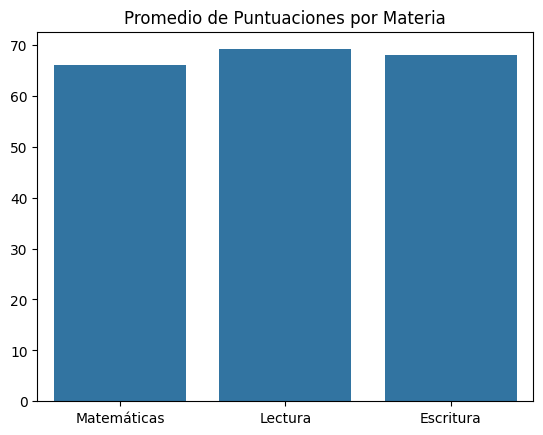

In [ ]:
scores = [df['math score'].mean(), df['reading score'].mean(), df['writing score'].mean()]
sns.barplot(x=['Matemáticas', 'Lectura', 'Escritura'], y=scores)
plt.title('Promedio de Puntuaciones por Materia')
plt.show()


In [ ]:
numeric_stats = df.describe()

categorical_stats = df.describe(include=['object'])

print("Estadísticas Descriptivas de las Variables Numéricas:")
print(numeric_stats)

print("\nEstadísticas Descriptivas de las Variables Categóricas:")
print(categorical_stats)

Estadísticas Descriptivas de las Variables Numéricas:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Estadísticas Descriptivas de las Variables Categóricas:
        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   

       test preparation course  
count                     1000  
unique                       2  
to

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='math score', ylabel='Count'>

Text(0.5, 1.0, 'Distribución de las Puntuaciones en Matemáticas')

Text(0.5, 0, 'Puntuación')

Text(0, 0.5, 'Frecuencia')

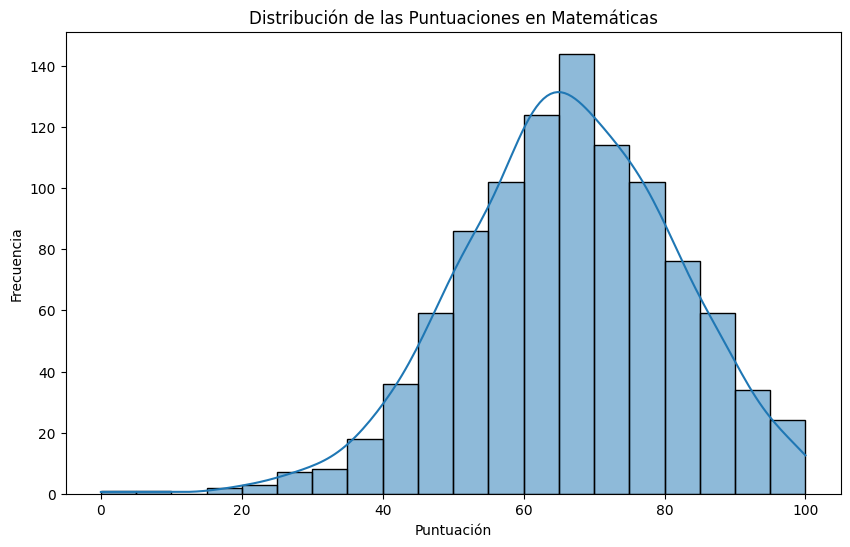

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='reading score', ylabel='Count'>

Text(0.5, 1.0, 'Distribución de las Puntuaciones en Lectura')

Text(0.5, 0, 'Puntuación')

Text(0, 0.5, 'Frecuencia')

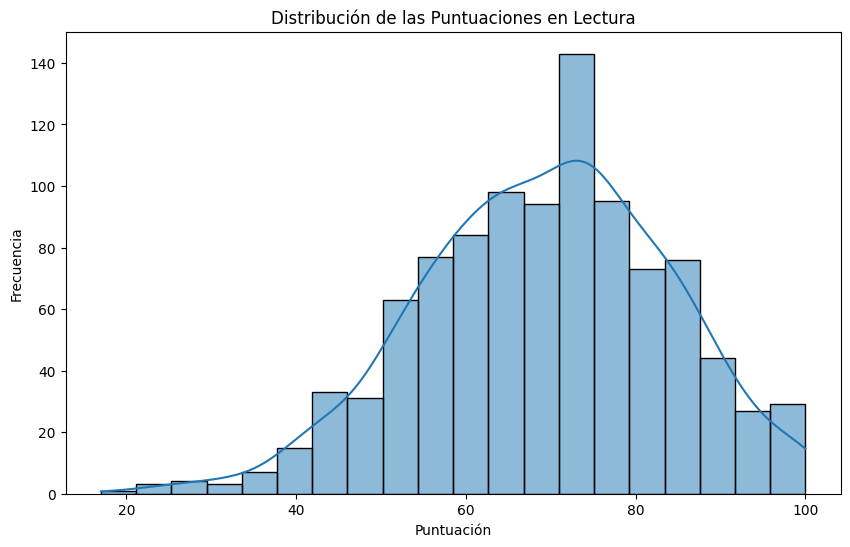

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='writing score', ylabel='Count'>

Text(0.5, 1.0, 'Distribución de las Puntuaciones en Escritura')

Text(0.5, 0, 'Puntuación')

Text(0, 0.5, 'Frecuencia')

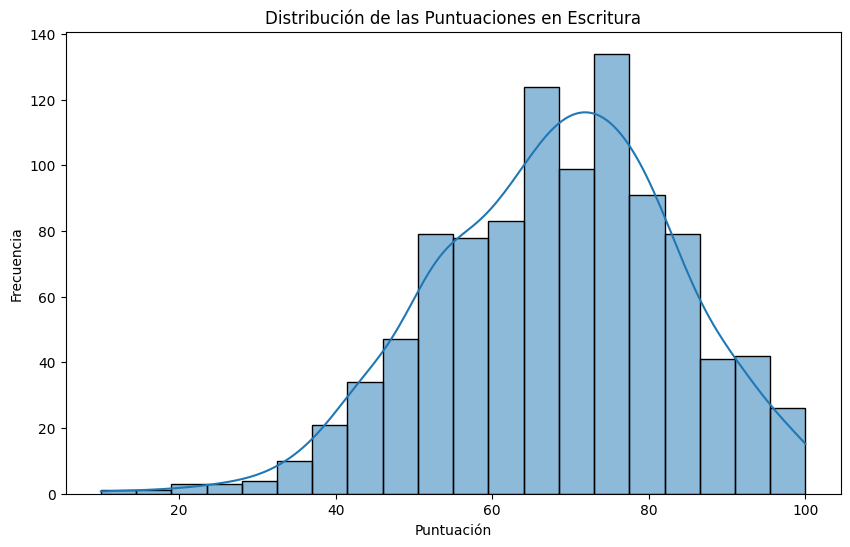

In [ ]:
subjects = {'math score': 'Matemáticas', 'reading score': 'Lectura', 'writing score': 'Escritura'}
for subject, subject_name in subjects.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df[subject], bins=20, kde=True)
    plt.title(f'Distribución de las Puntuaciones en {subject_name}')
    plt.xlabel('Puntuación')
    plt.ylabel('Frecuencia')
    plt.show()

A continuación, se realizará un análisis de manera detallada sobre cada gráfico de distribución de las puntuaciones de las materias:
* Matemáticas
* Lectura
* Escritura

Estos datos son representados por histogramas, donde se incluye una curva de densidad.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='math score', ylabel='Count'>

Text(0.5, 1.0, 'Distribución de las Puntuaciones en Matemáticas')

Text(0.5, 0, 'Puntuación')

Text(0, 0.5, 'Frecuencia')

Text(0.75, 0.9, 'Skewness: -0.28')

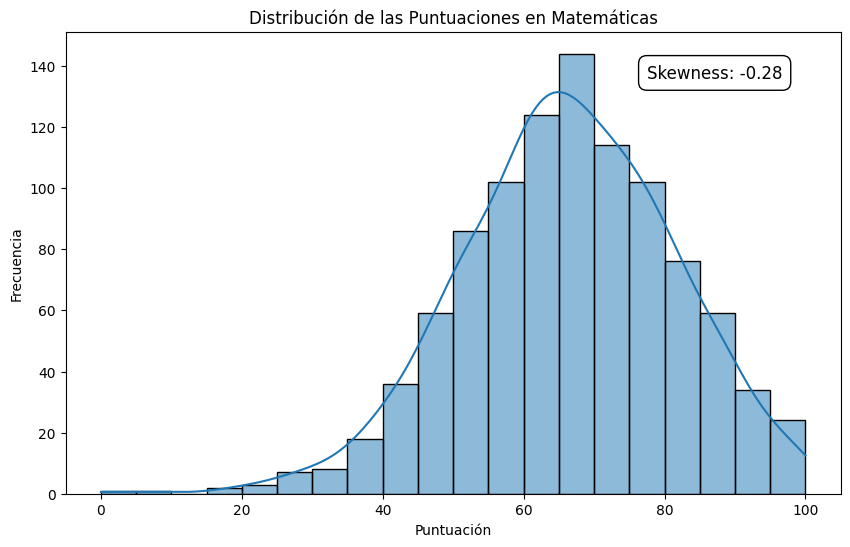

In [ ]:
math_skewness = skew(df['math score'])

plt.figure(figsize=(10, 6))
sns.histplot(df['math score'], bins=20, kde=True)
plt.title('Distribución de las Puntuaciones en Matemáticas')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')

plt.annotate(f'Skewness: {math_skewness:.2f}', xy=(0.75, 0.9), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

En este gráfico se puede observar que:

* La distribución de puntuaciones en matemáticas parece tener una distribución normal, debido a que se puede observar que la curva de densidad tiene una forma de de campaña.

* La curva observada tiene una ligera asimetría negativa, es decir, sesgo a la izquierda (-0.28). Esto lo podemos concluir porque la distribución tiene una cola más larga o más extendida hacia la izquierda. Este sesgo a la izquierda indica que la mayoría de los estudiantes tienen puntuaciones que están relativamente cerca del promedio, pero de igual modo, hay algunos estudiantes con puntuaciones muy bajas que extienden la cola hacia la izquierda.

* La moda o puntuación más frecuente parece estar en el rango de notas de 60-65. Esto se puede concluir debido al pico que hay en el histograma donde abarca dichos rangos de notas.

* La frecuencia más alta de puntuaciones está por el valor de 140, en la categoría de puntuación entre 60 y 65.

* Son pocos los estudiantes con notas muy bajas o muy altas. Se puede observar que la frecuencia de obtener una nota entre 20-30 es muy baja y que a pesar que la frecuencia de una nota más alta como de 90 es de 40, pero este igual sigue baja a comparación de las puntuaciones en el rango medio.


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='reading score', ylabel='Count'>

Text(0.5, 1.0, 'Distribución de las Puntuaciones en Lectura')

Text(0.5, 0, 'Puntuación')

Text(0, 0.5, 'Frecuencia')

Text(0.75, 0.9, 'Skewness: -0.26')

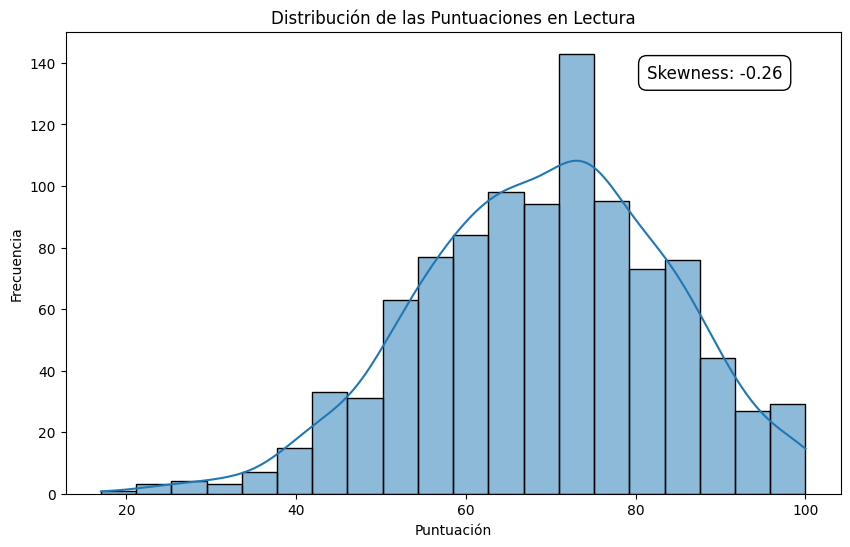

In [ ]:
reading_skewness = skew(df['reading score'])

plt.figure(figsize=(10, 6))
sns.histplot(df['reading score'], bins=20, kde=True)
plt.title('Distribución de las Puntuaciones en Lectura')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')

plt.annotate(f'Skewness: {reading_skewness:.2f}', xy=(0.75, 0.9), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

En este histograma, se puede observar que:

* La distribución de las puntuaciones parece tener una forma aproximadamente normal, pero igual cuenta con una pequeña asimetría hacia la izquierda (-0.26). Esto indica que la mayoría de los estudiantes tienen puntuaciones cercanas a la media, cpero de igual modo hay algunos estudiantes que obtienen puntuaciones significativamente más bajas.

* La mayoría de las puntuaciones se encuentran agrgupadas dentro del rango de 50 - 90.

* La moda se encuentra entre 70-80, con un pico alrededor de 75 y su frecuencia alcanza un valor máximo aproximadamente de 140.

* Las notas en la materia de lectura van desde 20 hasta 100 y su frecuencia más baja en ambos extremos se encuentra entre 20-30 y 90-100.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='writing score', ylabel='Count'>

Text(0.5, 1.0, 'Distribución de las Puntuaciones en Escritura')

Text(0.5, 0, 'Puntuación')

Text(0, 0.5, 'Frecuencia')

Text(0.75, 0.9, 'Skewness: -0.29')

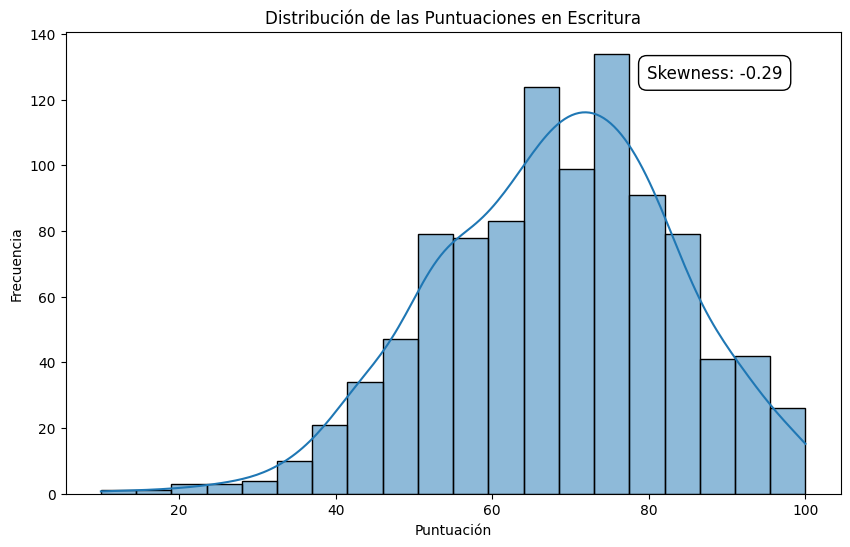

In [ ]:
writing_skewness = skew(df['writing score'])

plt.figure(figsize=(10, 6))
sns.histplot(df['writing score'], bins=20, kde=True)
plt.title('Distribución de las Puntuaciones en Escritura')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')

plt.annotate(f'Skewness: {writing_skewness:.2f}', xy=(0.75, 0.9), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

Con respecto al histograma de la materia de lectura se puede mencionar que:

* Las puntuaciones en la materia de escritura también cuentan con una pequeña asimetría negativa de -0.29.

* La mayoría de las puntuaciones se encuentran agrupadas en el rango de 50-90, donde el mayor concentración se encuentran entre 60-80.

* La moda se encuentra entre el rango de 70 y 90.

* Se puede observar un pico claro alrededor de 75, donde su frecuencia alcanza un valor máximo aproximado de 130.

In [ ]:
math_mode = df['math score'].mode()[0]
reading_mode = df['reading score'].mode()[0]
writing_mode = df['writing score'].mode()[0]

print(f'La moda de math scores es: {math_mode}')
print(f'La moda de reading scores es: {reading_mode}')
print(f'La moda de writing scores es: {writing_mode}')

La moda de math scores es: 65
La moda de reading scores es: 72
La moda de writing scores es: 74


##Visualización y análisis de correlación entre las diferentes materias.


A continuación, se muestra un gráfico de una matriz de correlación en forma de mapa de calor.

En esta matriz de correlación se evalúa las variabales de puntuaciones en las materias:
* Matemáticas
* Lectura
* Escritura



<Axes: >

Text(0.5, 1.0, 'Correlación entre Puntuaciones en Matemáticas, Lectura y Escritura')

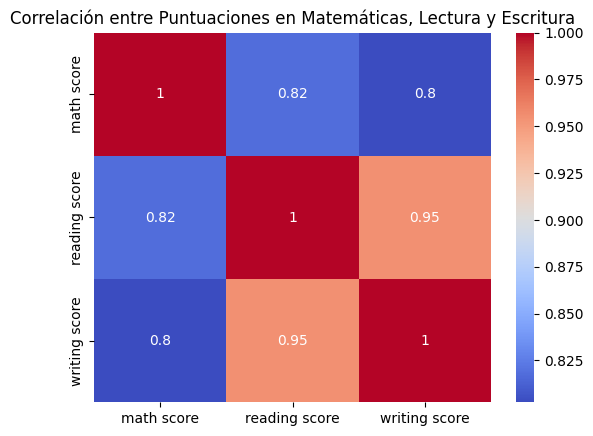

In [ ]:
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Puntuaciones en Matemáticas, Lectura y Escritura')
plt.show()

**Resumen de la matriz**

* Las puntuaciones de matemáticas y lectura es de un 0.82.

* Las puntuaciones entre matemática y escritura es de 0.8.

* Las puntuaciones entre lectura y escritura es de 0.95.

**Observaciones**

* Todas las correlaciones cuentan con un valor alto, eso significa que existe una fuerte relación positiva entre estas puntuaciones.

**Conclusiones**

* Se puede concluir que los estudiantes que tienen puntuaciones altas en una materia, tienden a tener puntuaciones altas también en las demás materias. La alta correlación entre las puntuaciones entre Matemáticas, Lectura y Escritura sugiere una relación positivamente fuerte entre estas habilidades académicas.

* El valor de la correlación más fuerte es entre Lectura y Escritura, por lo que muchos estudiantes tienen un rendimiento académico bastante sólido con respecto a estas habilidades.




A continuación, se presentan unos gráficos de dispersión relacionado con las puntuaciones de cada una de las materias con el fin de observar las correlaciones y poder determinar la fuerza de la relación lineal entre dos variables.

Se crearán diagramas de dispersión entre las variables:
* Math score y reading score
* Math score y writing score
* Reading score y writing score

<Axes: xlabel='math score', ylabel='reading score'>

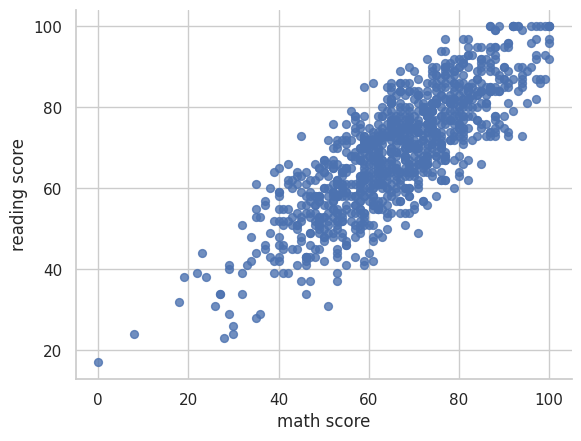

In [ ]:
df.plot(kind='scatter', x='math score', y='reading score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='math score', ylabel='writing score'>

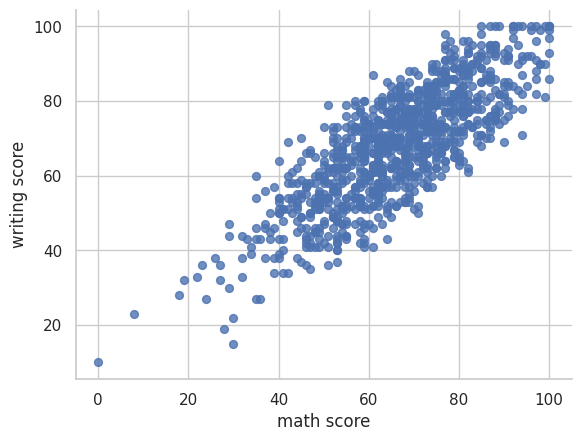

In [ ]:
df.plot(kind='scatter', x='math score', y='writing score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='reading score', ylabel='writing score'>

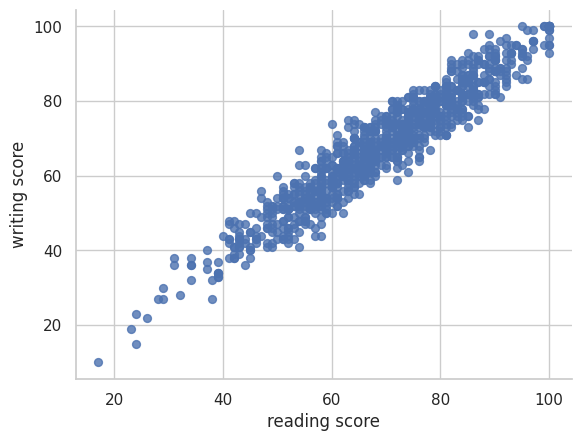

In [ ]:
df.plot(kind='scatter', x='reading score', y='writing score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

A través de estos gráficos, se puede observar una fuerte correlación entre las variables, lo que sugiere que una función lineal podría predecir con precisión los resultados.




##Relación entre características demográficas/socioeconómicas y rendimiento en los exámenes

En este apartado se presentarán gráficos de caja.

En estas cajas se incluyen los datos más cercanos a la media (50% de los datos) y en los bigotes se representan los otros 50% de los datos conformado por:

* 25% más pequeño
* 25% más grande

En estos diagramas se puede ver el valor de la mediana (línea en el medio de la caja) que nos permiten saber si los datos son simétricos o están desplazados hacia algún lado.

* Si la mediana se encuentra más abajo de la caja, quiere decir que hay una asimetría positiva.

* Si la mediana se encuentra más arriba de la caja, quiere decir que hay una asimetría negativa.

El símbolo de círculo o punto observados en el gráfica representan a valores extremos o valores atípicos. A pesar de que entre los dos bigotes se tiene el 100% de los datos, hay uno o varios datos que se escapan de la normalidad y se encuentra alejado a la media y mediana del grupo.

<Figure size 1400x600 with 0 Axes>

<Axes: >

<Axes: xlabel='gender', ylabel='math score'>

Text(0.5, 1.0, 'Puntuación en Matemáticas por Género')

<Axes: >

<Axes: xlabel='gender', ylabel='reading score'>

Text(0.5, 1.0, 'Puntuación en Lectura por Género')

<Axes: >

<Axes: xlabel='gender', ylabel='writing score'>

Text(0.5, 1.0, 'Puntuación en Escritura por Género')

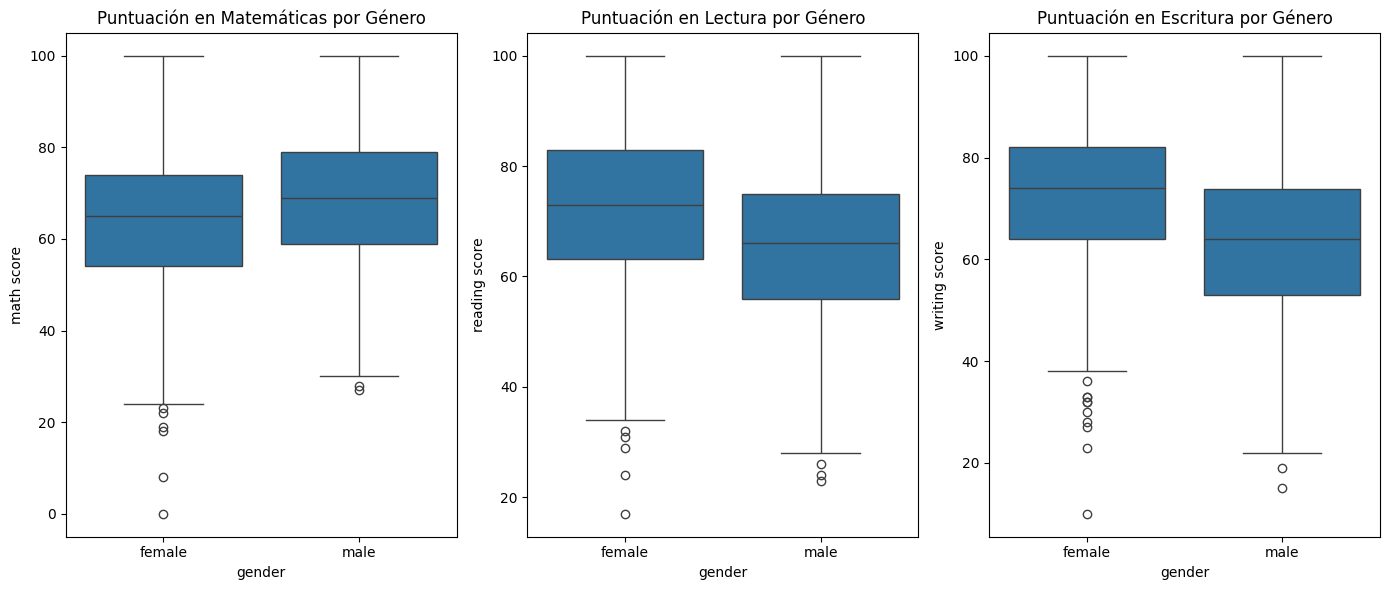

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Puntuación en Matemáticas por Género')
plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Puntuación en Lectura por Género')
plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Puntuación en Escritura por Género')
plt.tight_layout()
plt.show()

Observaciones:

* En las puntuaciones de matemáticas el género masculo tiene una media más alta.

* A pesar de que ambos géneros cuentan con valores atípicos, las mujeres cuentan con mayores valores atípicos en todas las materias.

* Las mujeres tienen una media más alta en materias de lectura y escritura.

* El género masculino presentó tener una menor dispersión en las puntuaciones.

Se puede concluir que hay diferencias en el rendimiento académico entre géneros, donde los hombres demuestran un rendimiento más consistente en matemáticas, pero más bajo en lectura y escritura. Por otro lado, las mujeres tienen mayor variabilidad en sus puntajes y rendimiento superior en lectura y escritura.


In [ ]:
subjectScores = ['math score', 'reading score', 'writing score']

for subject in subjectScores:
  reading_stats = df.groupby('gender')[subject].describe()
  print(f"Estadísticas Descriptivas para Puntuaciones en {subject} por género:\n")
  print(reading_stats,"\n\n")



Estadísticas Descriptivas para Puntuaciones en math score por género:

        count       mean        std   min   25%   50%   75%    max
gender                                                            
female  518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0
male    482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0 


Estadísticas Descriptivas para Puntuaciones en reading score por género:

        count       mean        std   min    25%   50%   75%    max
gender                                                             
female  518.0  72.608108  14.378245  17.0  63.25  73.0  83.0  100.0
male    482.0  65.473029  13.931832  23.0  56.00  66.0  75.0  100.0 


Estadísticas Descriptivas para Puntuaciones en writing score por género:

        count       mean        std   min   25%   50%    75%    max
gender                                                             
female  518.0  72.467181  14.844842  10.0  64.0  74.0  82.00  100.0
male    482.0  63.311203  14.11

<Figure size 1400x600 with 0 Axes>

<Axes: >

<Axes: xlabel='race/ethnicity', ylabel='math score'>

Text(0.5, 1.0, 'Puntuación en Matemáticas por Grupo Étnico')

<Axes: >

<Axes: xlabel='race/ethnicity', ylabel='reading score'>

Text(0.5, 1.0, 'Puntuación en Lectura por Grupo Étnico')

<Axes: >

<Axes: xlabel='race/ethnicity', ylabel='writing score'>

Text(0.5, 1.0, 'Puntuación en Escritura por Grupo Étnico')

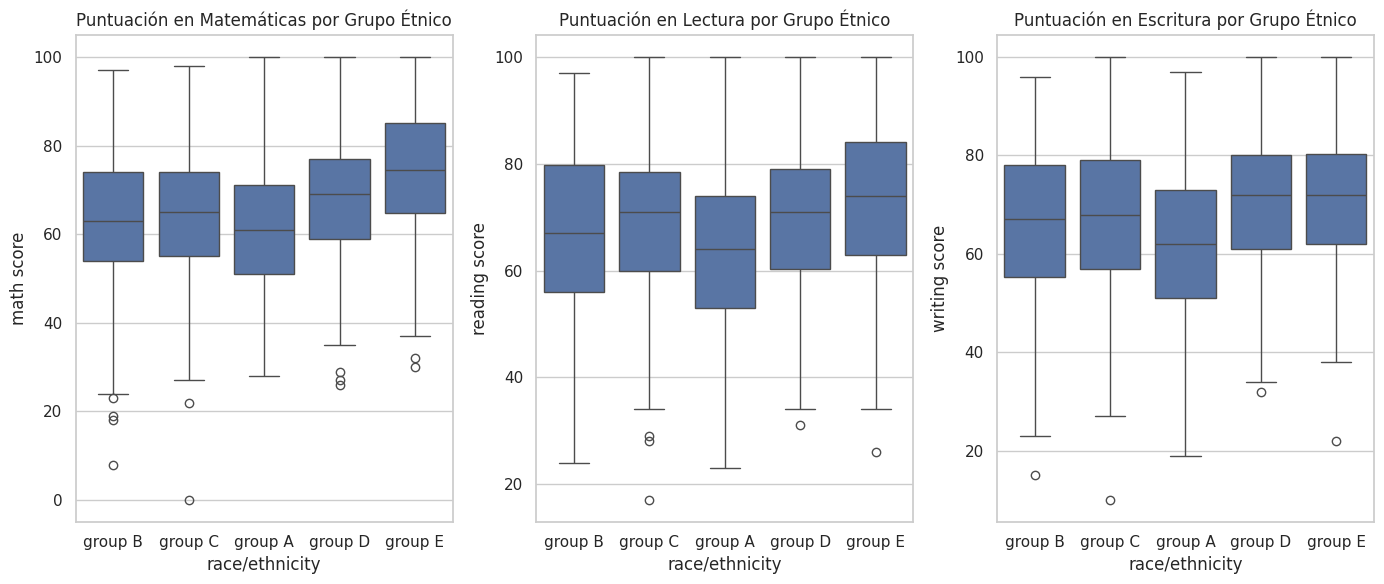

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='race/ethnicity', y='math score', data=df)
plt.title('Puntuación en Matemáticas por Grupo Étnico')
plt.subplot(1, 3, 2)
sns.boxplot(x='race/ethnicity', y='reading score', data=df)
plt.title('Puntuación en Lectura por Grupo Étnico')
plt.subplot(1, 3, 3)
sns.boxplot(x='race/ethnicity', y='writing score', data=df)
plt.title('Puntuación en Escritura por Grupo Étnico')
plt.tight_layout()
plt.show()

* Los grupos A, B y C tienen puntuaciones más bajas

* Se puede observar como el grupo A tiene un peor rendimiento.

* Los grupos con mejores puntuaciones son el grupo E y grupo D.

* El rendimiento académico del grupo E es muy buena en todas las materias a comparación de otros grupos étnicos.

* En matemáticas los grupos A y D tienen menor dispersión.

* En lectura los grupos C y D tienen menor dispersión

* En escritura los grupos C y D tienen menor dispersión.

Estos resultados sugieren que el grupo E cuenta con mejor rendimiento en promedio y por el otro lado se tiene que el grupo D muestra menor dispersión y menores valores atípicos en las puntuaciones de las 3 materias.


In [ ]:
for subject in subjectScores:
  reading_stats = df.groupby('race/ethnicity')[subject].describe()
  print(f"Estadísticas Descriptivas para Puntuaciones en {subject} por grupo étnico:\n")
  print(reading_stats,"\n\n")


Estadísticas Descriptivas para Puntuaciones en math score por grupo étnico:

                count       mean        std   min    25%   50%   75%    max
race/ethnicity                                                             
group A          89.0  61.629213  14.523008  28.0  51.00  61.0  71.0  100.0
group B         190.0  63.452632  15.468191   8.0  54.00  63.0  74.0   97.0
group C         319.0  64.463950  14.852666   0.0  55.00  65.0  74.0   98.0
group D         262.0  67.362595  13.769386  26.0  59.00  69.0  77.0  100.0
group E         140.0  73.821429  15.534259  30.0  64.75  74.5  85.0  100.0 


Estadísticas Descriptivas para Puntuaciones en reading score por grupo étnico:

                count       mean        std   min    25%   50%    75%    max
race/ethnicity                                                              
group A          89.0  64.674157  15.543762  23.0  53.00  64.0  74.00  100.0
group B         190.0  67.352632  15.177499  24.0  56.00  67.0  79.75   97.0


<Figure size 2500x600 with 0 Axes>

<Axes: >

<Axes: xlabel='parental level of education', ylabel='math score'>

Text(0.5, 1.0, 'Puntuación en Matemáticas por Nivel Educativo de los Padres')

<Axes: >

<Axes: xlabel='parental level of education', ylabel='reading score'>

Text(0.5, 1.0, 'Puntuación en Lectura por Nivel Educativo de los Padres')

<Axes: >

<Axes: xlabel='parental level of education', ylabel='writing score'>

Text(0.5, 1.0, 'Puntuación en Escritura por Nivel Educativo de los Padres')

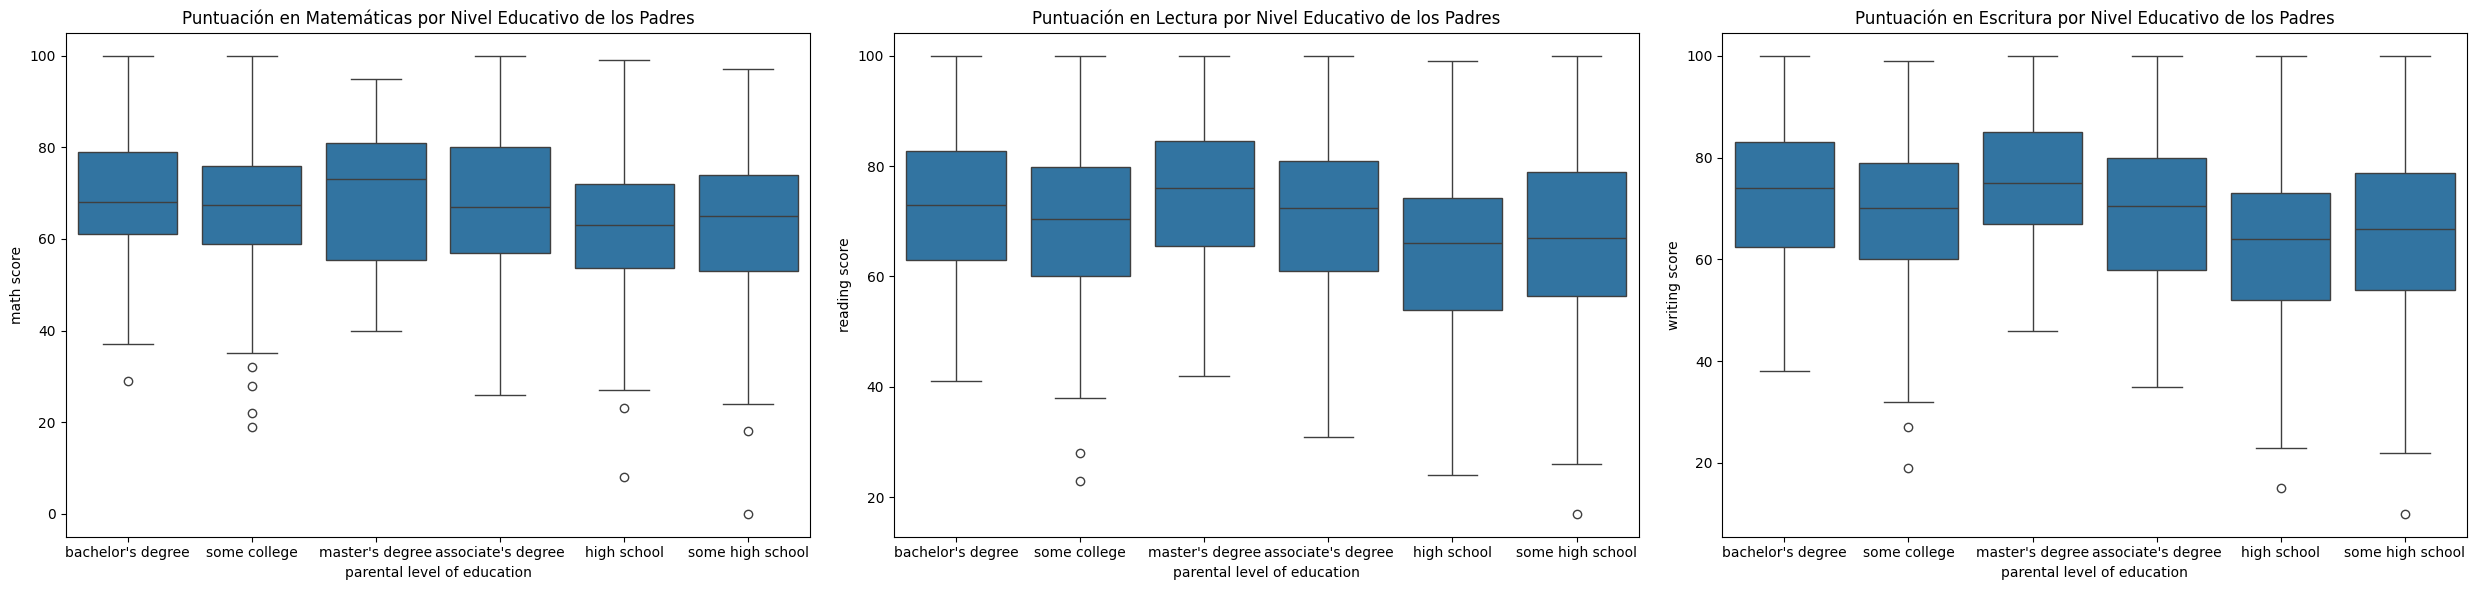

In [ ]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title('Puntuación en Matemáticas por Nivel Educativo de los Padres')
plt.subplot(1, 3, 2)
sns.boxplot(x='parental level of education', y='reading score', data=df)
plt.title('Puntuación en Lectura por Nivel Educativo de los Padres')
plt.subplot(1, 3, 3)
sns.boxplot(x='parental level of education', y='writing score', data=df)
plt.title('Puntuación en Escritura por Nivel Educativo de los Padres')
plt.tight_layout()
plt.show()

* En las puntuaciones de matemáticas se presentan más valores atípicos de estudiantes cuyos padres cuentan con un nivel de educación equivalente a **some college**.

* En las puntuaciones de matemáticas, los estudiantes cuyos padres tienen un nivel de educación **some college** tienen menor dispersión.

* En puntuaciones de elctura y escritura, los estudiantes cuyos padres con un nivel educatico de **master's degree** son los que tienen menor dispersión.

* Hay una tendencia general en la que los estudiantes cuyos padres tengan un mayor nivel educativo tienden a obtener mejores puntajes. Los hijos de los padres que tengan títulos de **bachelor's degree y master's degree** muestran puntuaciones más altas.

* La variabilidad de cada grupo es considerable, por lo que hay una amplia gama de resultados dentro de cada nivel educativo de los padres. Esta observación sugiere que a pesar de que el nivel académico de los padres tienen cierta influencia en las puntuaciones, no es el único determinantes en el rendimiento académico.



In [ ]:
for subject in subjectScores:
  reading_stats = df.groupby('parental level of education')[subject].describe()
  print(f"Estadísticas Descriptivas para Puntuaciones en {subject} por nivel educativo de los padres:\n")
  print(reading_stats,"\n\n")

Estadísticas Descriptivas para Puntuaciones en math score por nivel educativo de los padres:

                             count       mean        std   min    25%   50%  \
parental level of education                                                   
associate's degree           222.0  67.882883  15.112093  26.0  57.00  67.0   
bachelor's degree            118.0  69.389831  14.943789  29.0  61.00  68.0   
high school                  196.0  62.137755  14.539651   8.0  53.75  63.0   
master's degree               59.0  69.745763  15.153915  40.0  55.50  73.0   
some college                 226.0  67.128319  14.312897  19.0  59.00  67.5   
some high school             179.0  63.497207  15.927989   0.0  53.00  65.0   

                              75%    max  
parental level of education               
associate's degree           80.0  100.0  
bachelor's degree            79.0  100.0  
high school                  72.0   99.0  
master's degree              81.0   95.0  
some college   

<Figure size 1400x600 with 0 Axes>

<Axes: >

<Axes: xlabel='lunch', ylabel='math score'>

Text(0.5, 1.0, 'Puntuación en Matemáticas por Tipo de Almuerzo')

<Axes: >

<Axes: xlabel='lunch', ylabel='reading score'>

Text(0.5, 1.0, 'Puntuación en Lectura por Tipo de Almuerzo')

<Axes: >

<Axes: xlabel='lunch', ylabel='writing score'>

Text(0.5, 1.0, 'Puntuación en Escritura por Tipo de Almuerzo')

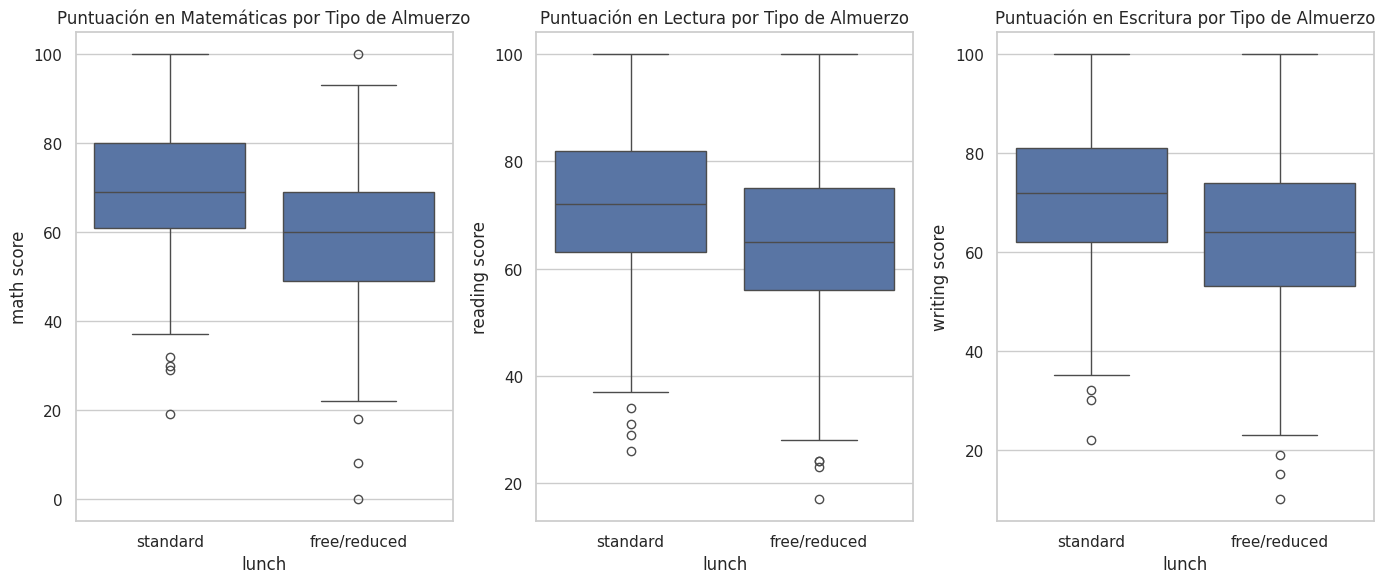

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='lunch', y='math score', data=df)
plt.title('Puntuación en Matemáticas por Tipo de Almuerzo')
plt.subplot(1, 3, 2)
sns.boxplot(x='lunch', y='reading score', data=df)
plt.title('Puntuación en Lectura por Tipo de Almuerzo')
plt.subplot(1, 3, 3)
sns.boxplot(x='lunch', y='writing score', data=df)
plt.title('Puntuación en Escritura por Tipo de Almuerzo')
plt.tight_layout()
plt.show()

* La media de los alumnos con almuerzo standar es mucho mayor en todas las materias.

* Se presentan valores atípicos sin importar el tipo de almuerzo, pero quellos con almuerzo free/reduced cuentan con valores atípicos más bajos llegando a una puntuación cercana o igual a 0.

* Los estudiantes con almuerzo standard tienen una dispersión más baja en todas las puntuaciones.

Estos resultados sugieren que los estudiantes que reciben un almuerzo estándar tienden a tener notas más consistentes y menos dispersas en todas las materias. De igual modo, cuentan con menos valores atípicos expremos, es decir, menor variabilidad en sus puntuaciones.

In [ ]:
for subject in subjectScores:
  reading_stats = df.groupby('lunch')[subject].describe()
  print(f"Estadísticas Descriptivas para Puntuaciones en {subject} por tipo de almuerzo:\n")
  print(reading_stats,"\n\n")

Estadísticas Descriptivas para Puntuaciones en math score por tipo de almuerzo:

              count       mean        std   min   25%   50%   75%    max
lunch                                                                   
free/reduced  355.0  58.921127  15.159956   0.0  49.0  60.0  69.0  100.0
standard      645.0  70.034109  13.653501  19.0  61.0  69.0  80.0  100.0 


Estadísticas Descriptivas para Puntuaciones en reading score por tipo de almuerzo:

              count       mean        std   min   25%   50%   75%    max
lunch                                                                   
free/reduced  355.0  64.653521  14.895339  17.0  56.0  65.0  75.0  100.0
standard      645.0  71.654264  13.830602  26.0  63.0  72.0  82.0  100.0 


Estadísticas Descriptivas para Puntuaciones en writing score por tipo de almuerzo:

              count       mean        std   min   25%   50%   75%    max
lunch                                                                   
free/reduced  3

<Figure size 1400x600 with 0 Axes>

<Axes: >

<Axes: xlabel='test preparation course', ylabel='math score'>

Text(0.5, 1.0, 'Math Score x Test Preparation')

<Axes: >

<Axes: xlabel='test preparation course', ylabel='reading score'>

Text(0.5, 1.0, 'Reading score x Test Preparation')

<Axes: >

<Axes: xlabel='test preparation course', ylabel='writing score'>

Text(0.5, 1.0, 'Writing score x Test Preparation')

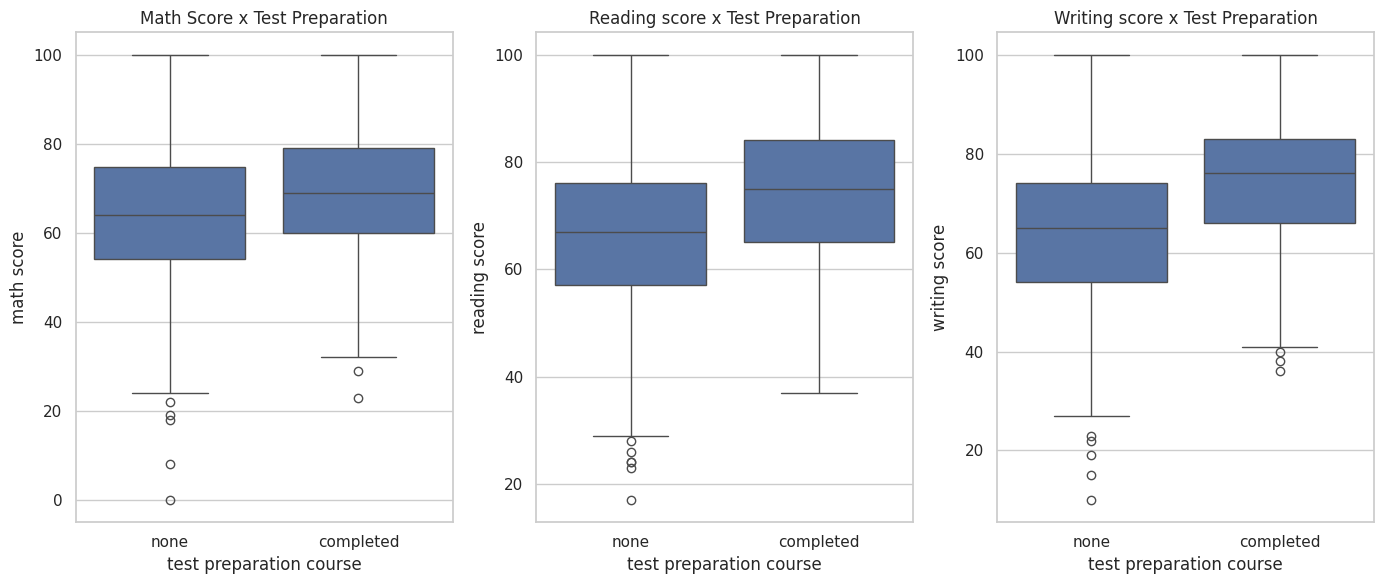

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Math Score x Test Preparation')
plt.subplot(1, 3, 2)
sns.boxplot(x='test preparation course', y='reading score', data=df)
plt.title('Reading score x Test Preparation')
plt.subplot(1, 3, 3)
sns.boxplot(x='test preparation course', y='writing score', data=df)
plt.title('Writing score x Test Preparation')
plt.tight_layout()
plt.show()

* Los estudiantes que completaron el curso de preparación tienden a tener un mejor rendimiento académico en comparación con lo que no lo hicieron.

* Los estudiantes que completaron el curso de preparación tienen una menor dispersión en sus puntuaciones, esto sugiere que hay una mayor consistencia en el rendimiento de estos estudiantes.

* Los estudiantes que completaron el curso muestra una mejora en sus puntuaciones, mayores medianas y menor desviación.

* Se puede observar como hay más valores atípicos para los estudiantes que no completaron el curso.

In [ ]:
for subject in subjectScores:
  reading_stats = df.groupby('test preparation course')[subject].describe()
  print(f"Estadísticas Descriptivas para Puntuaciones en {subject} por curso de examen de preparación:\n")
  print(reading_stats,"\n\n")

Estadísticas Descriptivas para Puntuaciones en math score por curso de examen de preparación:

                         count       mean        std   min   25%   50%    75%  \
test preparation course                                                         
completed                358.0  69.695531  14.444699  23.0  60.0  69.0  79.00   
none                     642.0  64.077882  15.192376   0.0  54.0  64.0  74.75   

                           max  
test preparation course         
completed                100.0  
none                     100.0   


Estadísticas Descriptivas para Puntuaciones en reading score por curso de examen de preparación:

                         count       mean        std   min   25%   50%   75%  \
test preparation course                                                        
completed                358.0  73.893855  13.638384  37.0  65.0  75.0  84.0   
none                     642.0  66.534268  14.463885  17.0  57.0  67.0  76.0   

                          

##Modelo Predictivo

El modelo predictivo escogido para estos datos es el de regresión lineal, debibo a que en el análisis de correlación se pudo observar una fuerte correlación entre las puntuaciones en matemáticas, lectura y escritura. Los análisis de la correlación sigieren que hay una relación lineal entre las variables, lo que hace que este modelo escogido sea adecuado.

El modelo de regrsión lineal utiliza una evaluación de R² score. Este nos indicará qué tan bien se ajustan nuestros datos a un modelo de regresión lineal, donde el resultado se encuentra en el rango de 0 a 1.

* R² = 0: Indica que el modelo no tiene capacidad predictiva.

* R² es un valor entre 0 y 1: Cuando más cercano a 1 significa que mejor es el modelo para predecir una variable dependiente.

* R² = 1: Indica que el modelo predice perfectamente los datos de entrenamiento.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data_dummies = pd.get_dummies(df, drop_first=True) # Permitirá representar las los datos categóticos como variables numéricas para una mayor facilidad
variables_respuesta = ['math score', 'reading score', 'writing score']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

params = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False],
    'regressor__n_jobs': [None, -1]
}

grid_search = GridSearchCV(pipeline, params, cv=5, scoring='r2')

In [ ]:
for variable in variables_respuesta:
    X = data_dummies.drop(variable, axis=1)
    y = data_dummies[variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    grid_search.fit(X_train, y_train)
    print(f'Mejores Parámetros para {variable}: {grid_search.best_params_}')

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mejor modelo de regresión lineal para {variable}:')
    print(f'Error cuadrático medio: {mse}')
    print(f'Coeficiente de determinación (R²): {r2}')

    coef = best_model.named_steps['regressor'].coef_
    feature_names = X.columns

    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})

    coef_df['Absolute Coefficient'] = np.abs(coef_df['Coefficient'])
    coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

    print("Variables más influyentes en el modelo de regresión lineal:")
    print(coef_df[['Feature', 'Coefficient']].sort_values(by='Coefficient', ascending=False))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__copy_X': [True, False],
                         'regressor__fit_intercept': [True, False],
                         'regressor__n_jobs': [None, -1]},
             scoring='r2')

Mejores Parámetros para math score: {'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__n_jobs': None}
Mejor modelo de regresión lineal para math score:
Error cuadrático medio: 29.095169866715466
Coeficiente de determinación (R²): 0.8804332983749565
Variables más influyentes en el modelo de regresión lineal:
                                          Feature  Coefficient
1                                   writing score    10.917190
2                                     gender_male     6.523433
0                                   reading score     3.411114
6                          race/ethnicity_group E     1.722706
12                                 lunch_standard     1.670003
13                   test preparation course_none     1.567760
10       parental level of education_some college     0.418738
8         parental level of education_high school     0.370851
11   parental level of education_some high school     0.284983
3                          race/ethnic

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__copy_X': [True, False],
                         'regressor__fit_intercept': [True, False],
                         'regressor__n_jobs': [None, -1]},
             scoring='r2')

Mejores Parámetros para reading score: {'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__n_jobs': None}
Mejor modelo de regresión lineal para reading score:
Error cuadrático medio: 18.565599730519732
Coeficiente de determinación (R²): 0.9179545661050625
Variables más influyentes en el modelo de regresión lineal:
                                          Feature  Coefficient
1                                   writing score    13.026867
0                                      math score     1.874872
13                   test preparation course_none     0.936534
11   parental level of education_some high school     0.432955
8         parental level of education_high school     0.357084
2                                     gender_male     0.064475
10       parental level of education_some college    -0.087926
6                          race/ethnicity_group E    -0.133680
9     parental level of education_master's degree    -0.148109
3                          race/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__copy_X': [True, False],
                         'regressor__fit_intercept': [True, False],
                         'regressor__n_jobs': [None, -1]},
             scoring='r2')

Mejores Parámetros para writing score: {'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__n_jobs': None}
Mejor modelo de regresión lineal para writing score:
Error cuadrático medio: 14.911021437246667
Coeficiente de determinación (R²): 0.9381328994057507
Variables más influyentes en el modelo de regresión lineal:
                                          Feature  Coefficient
1                                   reading score     9.483260
0                                      math score     4.368215
5                          race/ethnicity_group D     0.878631
7   parental level of education_bachelor's degree     0.436950
4                          race/ethnicity_group C     0.402299
9     parental level of education_master's degree     0.287355
12                                 lunch_standard     0.181833
3                          race/ethnicity_group B     0.087867
10       parental level of education_some college    -0.132852
6                          race/

###**Análisis de resultados**

####Variables para evaluar el resultado del modelo

* mse: Representa al error cuadrático medio y mide la diferencia promedio cuadrática entre los valores observados y los predichos por el modelo.

* r2: Representa al coeficiente de determinación. Un R² cercano a 1 sugiere un buen ajuste.

####Mejores parámetros














A través del comando grid search se determinó que los mejores parámetros para el modelo de regresión lineal son:

* regressor__copy_X = True: Este parámetro indica que se realizará una copia de los datos de entrada antes de realizar el ajuste del modelo.

* regressor__fit_intercept = True: El modelo calculará un término de intercepción. Este parámetro es fundamental para poder captar de manera correcta las relaciones en los datos, ya que permite que el modelo pueda ajustarse de manera más precisa a los valores observados.

* regressor__n_jobs = None: Cantidad de núcleos que se usarán, en este caso 0.



####Evaluación del modelo

Se optó por ajustar tres modelos separados apra predecir las puntuaciones de cada una de las materias (math score, reading score y writing score) debido a las siguientes razones:

1. La fuerte correlación entre las materias durante el análisis exploratorio de los datos. Esta alta correlagión sugiere que los puntajes de cada una de las materias pueden ser predecidas a partir de los puntajes de las demás materias y por ende, el ajustar un único modelo para predecir las 3 materias de manera simultánea podría conducir una redundancia en la información y mayor complejidad del modelo.

2. Cada una de las materias puede estar influida por distintos conjuntos de datos demográficos (género, grupo étnico, nivel educativo de los padres, almuerzo y la preparación para el examen). El poder ajustar los modelos separados permitirá que el modelo capture todas estas relaciones entre estas características y las puntuaciones de cada materia, permitiendo de esta manera obtener una mejor interpretación y precisión a la hora de realizar sus respectivas predicciones.


A continuación se presenta la categorización de cada uno de los modelos junto con una tabla de resultados del mse y r2 de cada uno de ellos:

1. Modelo 1: Predice math score

2. Modelo 2: Predice reading score

3. Modelo 3: Predice writing score

| Modelo          | Error cuadrático medio (MSE) | Coeficiente de determinación (R²) |
|-----------------|-------------------------------|-----------------------------------|
| Modelo 1        | 29.095                        | 88%                             |
| Modelo 2        | 18.566                        | 91.8%                             |
| Modelo 3        | 14.911                        | 93.8%                             |


Text(0.5, 0, 'Modelo')

Text(0, 0.5, 'Métrica')

Text(0.5, 1.0, 'Error cuadrático medio (MSE) y Coeficiente de determinación (R²) para cada modelo')

[Text(0.175, 0, 'Modelo 1'),
 Text(1.175, 0, 'Modelo 2'),
 Text(2.175, 0, 'Modelo 3')]

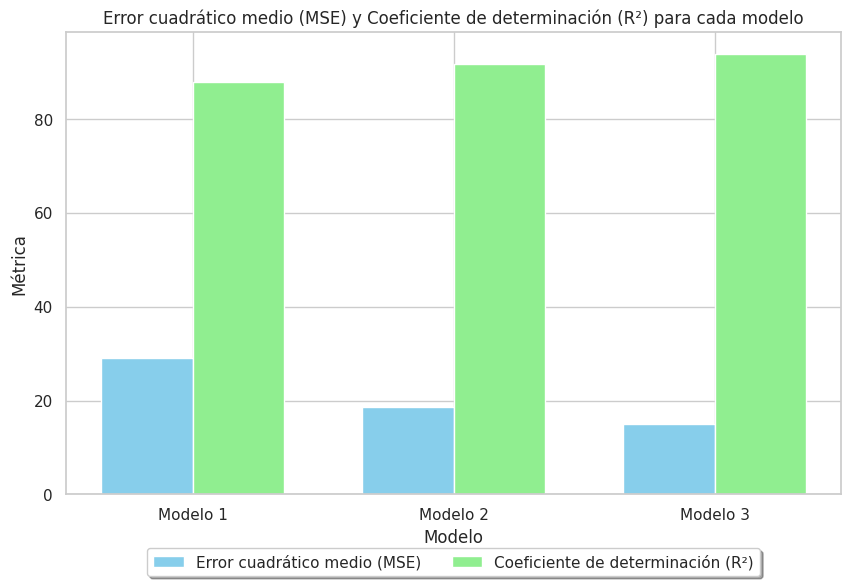

In [ ]:

modelos = ['Modelo 1', 'Modelo 2', 'Modelo 3']
mse = [29.095, 18.566, 14.911]
r2 = [88, 91.8, 93.8]

bar_width = 0.35

index = np.arange(len(modelos))
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(index, mse, bar_width, label='Error cuadrático medio (MSE)', color='skyblue')
bars2 = ax.bar(index + bar_width, r2, bar_width, label='Coeficiente de determinación (R²)', color='lightgreen')

ax.set_xlabel('Modelo')
ax.set_ylabel('Métrica')
ax.set_title('Error cuadrático medio (MSE) y Coeficiente de determinación (R²) para cada modelo')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(modelos)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)


plt.show()


A continuación se presentan las variables más influyentes de cada modelo:



Modelo 1 (Math Score)

| Variable            | Coeficiente |
|---------------------|-------------|
| Writing Score       | 10.91       |
| Gender (Male)       | 6.52        |
| Reading Score       | 3.41        |
| Race/Ethnicity (Group E) | 1.72   |

Modelo 2 (Reading Score)

| Variable                     | Coeficiente |
|------------------------------|-------------|
| Writing Score                | 13.02       |
| Math Score                   | 1.87        |
| Test Preparation Course (None) | 0.93        |
| Parental Level of Education_some (College)     | 0.41       |

Modelo 3 (Writing Score)

| Variable                     | Coeficiente |
|------------------------------|-------------|
| Reading Score                | 9.48        |
| Math Score                   | 4.36        |
| race/ethnicity_group (Group D)                | 0.87      |
| Parental Level of Education_bachelor's (Degree) | 0.43      |

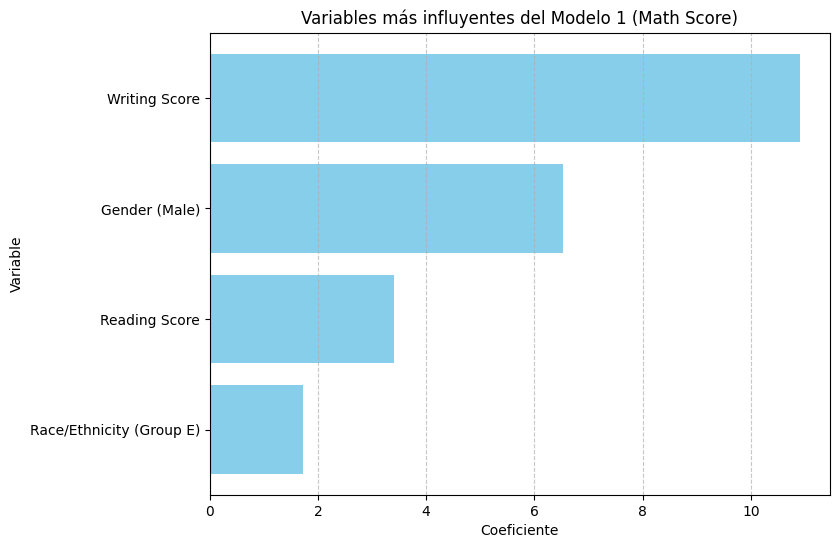

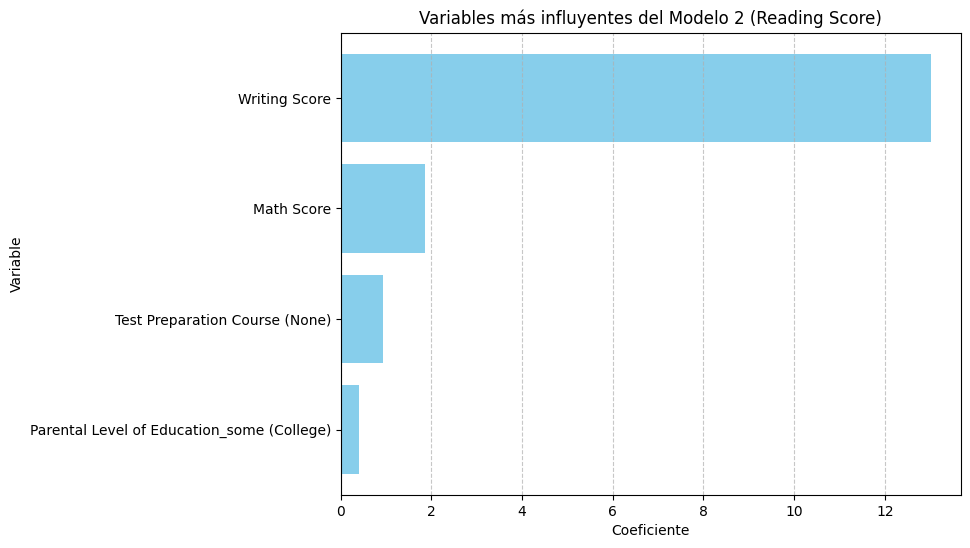

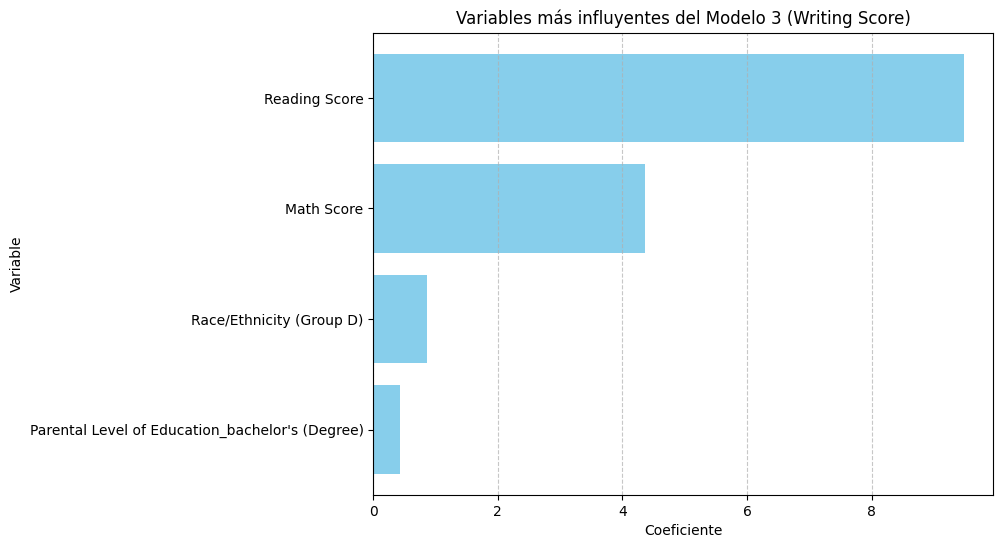

In [ ]:
variables_modelo1 = ['Writing Score', 'Gender (Male)', 'Reading Score', 'Race/Ethnicity (Group E)']
coeficientes_modelo1 = [10.91, 6.52, 3.41, 1.72]

variables_modelo2 = ['Writing Score', 'Math Score', 'Test Preparation Course (None)', 'Parental Level of Education_some (College)']
coeficientes_modelo2 = [13.02, 1.87, 0.93, 0.41]

variables_modelo3 = ['Reading Score', 'Math Score', 'Race/Ethnicity (Group D)', "Parental Level of Education_bachelor's (Degree)"]
coeficientes_modelo3 = [9.48, 4.36, 0.87, 0.43]

def plot_bar_chart(variables, coeficientes, modelo):
    plt.figure(figsize=(8, 6))
    plt.barh(variables, coeficientes, color='skyblue')
    plt.xlabel('Coeficiente')
    plt.ylabel('Variable')
    plt.title(f'Variables más influyentes del Modelo {modelo}')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

plot_bar_chart(variables_modelo1, coeficientes_modelo1, '1 (Math Score)')
plot_bar_chart(variables_modelo2, coeficientes_modelo2, '2 (Reading Score)')
plot_bar_chart(variables_modelo3, coeficientes_modelo3, '3 (Writing Score)')

####**Conclusiones**

1. Los tres modelos muestran un buen desempeño en términos de la capacidad para predecir las puntuaciones de las respectivas materias.

2. El Modelo 3, que predice las puntuaciones de escritura, tiene el menor error cuadrático medio y el coeficiente de determinación más alto, lo que indica que es el modelo más preciso.

3. Aunque el Modelo 3 demostró tener los mejores resultados, es importante destacar que el Modelo 2 también obtuvo un desempeño notablemente bueno, acercándose a los resultados del Modelo 3. Esta diferencia en el rendimiento podría atribuirse a las variables clave que influyeron en cada modelo tales como:

* Para el Modelo 2, la variable más influyente fue 'writing score', con un coeficiente de 13. Esto indica que las puntuaciones en escritura tienen un impacto significativo en la capacidad del modelo para predecir las puntuaciones en lectura. Por otro lado, 'math score' también contribuyó al modelo, aunque en menor medida, con un coeficiente de 1.87.

* Por otro lado, el Modelo 3 fue más influenciado por 'reading score', con un coeficiente de 9.48, y 'math score' con un coeficiente de 4.36. Estos hallazgos sugieren que las puntuaciones en lectura tienen un efecto más significativo en la predicción de las puntuaciones de escritura en este modelo en particular.

4. Los resultados sugieren que las características utilizadas en los modelos tienen una fuerte capacidad predictiva para las puntuaciones de las materias correspondientes.

###**Resumen de los hallazgos claves**

**Identificación y manejo de valores nulos o inconsistentes**

* Los datos venían completos, con el tipo de dato correcto y sin inconsistencias, por lo que no fue necesario aplicar limpieza de datos.

**Distribución de puntuaciones**

* La visualización de las distribuciones de las puntuaciones de las matemáticas, lectura y escritura mostró una distribución normal con algunas variaciones, mas que nada sesgo negativo (**math skewness: -0.28, reading skewness: -0.26, writing skewness -0.29**).

* El promedio de puntuaciones en matemáticas tiende a ser ligeramente más baja en compaaración con lectura y escritura (**math: 66, reading: 69.16, writing: 68.05**).

**Correlación entre las materias**

* Se observo una fuerte correlación entre las puntuaciones en lectura y escritura, sugiriendo así que los estudiantes que son buenos en una de estas áreas tienden a ser buenos igual en la otra.

* La correlación entre matemáticas y las otras dos materias es positiva, pero no tan fuerte (**math and writing: 0.8, math and reading: 0.82, reading and writing: 0.95**).

**Relación entre características demográficas/socioeconómicas y rendimiento**

* Género: Se identificaron diferencias en las puntuaciones de matemáticas y lectura y escritura entre los géneros, donde los hombres superan ligeramente a las chicas en matemáticas, pero no en las otras dos.

* Grupo étnico: Se observaron variaciones en el rendimiento entre distintos grupos étnicos donde el grupo E destacó con un mejor rendimiento y el grupo A con el rendimiento más bajo, indicando así posible sdisparidades educativas.

* Nivel educativo de los padres: Los estudiantes cuyos padres cuentan con un nivel educativo más alto son los que tienden a tener mejores puntuaciones en todas las materias (**master's degree**). Esto podría sugerir que hay un mayor apoyo académico y recursos en el hogar.

* Tipo de almuerzo: Los estudiantes que reciben almuerzos estándar son los que tienden a tener mejores resultados en comparación con aquellos que reciben almuerzos gratis o reducidos.

* Preparación para el examen: La preparación paara el examen se asocia con puntuaciones más altas, esto sugiere la importancia de una adecuada preparación para tener un mejor rendimiento académico.

**Modelo predictivo**

* Se construyó tres modelos predictivos  de regesión lineal con el fin de estimar el rendimiento en las materias matemáticas, lectura y escritura usando las características disponibles (**Modelo 1: math score, Modelo 2: reading score, Modelo 3: writing score**).

* El modelo demostró que aparte de las variables de las puntuaciones de otras materias, también las variables de género y de grupo étnico tienen influencia.


###**Recomendaciones**




A través de este análisis se pudo observar la importancia de los factores tanto demográficos como socioeconómicos en el rendimiento académico de los estudiantes, permitiendo saber qué aspectos se podrían intervenir para abordar estas disparidades educativas y poder apoyar a los estudiantes a obtener un mejor rendimiento académico.

Estas recomendaciones son simplemente propuestas que se considera que puede contribuir a mejorar los resultados académicos y promover una equidad educativa.

A continuación, se presentan las recomendaciones a implementar junto con ejemplos de métodos de implementación.


1. Implementar programas de apoyo personalizado

* Desarrollar programas de apoyo dirigida a grupos étnicos con menor rendimiento para reducir las disparidades educativas.

* Implementar tutorías y recursos adicionales para chicos en las áreas de lectura y escritura, por otro lado, para las chicas en el área de matemáticas, con el fin de ajustar el apoyo según a las necesidades específicas de cada género.

2. Mejorar la preparación para los exámenes

* Fortalecer y ampliar programas de preparación y hacer que estas sean más accesibles para todos los estudiantes. Estos programas pueden tener enfoques en técnicas de estudio, manejo del tiempo o simulacros de examen.

3. Realizar intervenciones según el nivel educativo de los padres

* Brindar talleres educativos y recursos informativos para los padres, en especial aquellos alumnos cuyos padres cuentan con un menor nivel educativo, esto con el fin de que puedan apoyar de manera efectiva el aprendizaje de sus hijos en el hogar.

4. Mejorar las políticas de almuerzo escolar

* Asegurar que todos los estudiantes tengan acceso a almuerzos nutritivos y de calidad.

5. Revisar y mejorar el enfoque al método de enseñanza en matemáticas

* Revisar y mejorar las metodologías de enseñanza en el área de las matemáticas, a través de formación adicional de los docentes y brindando más recursos educativos a los alumnos.

6. Realizar monitoreo y evaluación continua

* Es importante contar con un sistema de monitoreo continuo del rendimiento académico de los estudiantes para poder observar el impacto y efectividad de las intervenciones implementadas y poder realizar los ajustes necesarios según los resultados o críticas constructivas obtenidos.
